<a href="https://colab.research.google.com/github/ABDELLAH-Hallou/students_performance/blob/master/students_perf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# read in all our data
dt_students_mat = pd.read_csv("/content/drive/MyDrive/project/student-math.csv")
dt_students_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# set seed for reproducibility
np.random.seed(0) 

In [ ]:
# pd.set_option('display.max_columns', None)
dt_students_mat.head(395)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
"""Which, if either, are missing because they don't exist?
Which, if either, are missing because they weren't recorded?"""
# get the number of missing data points per column
missing_value_count = dt_students_mat.isnull().sum()
print(missing_value_count)
# how many total missing values do we have?
total_cells = np.product(dt_students_mat.shape)
print(total_cells)
total_missing = missing_value_count.sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
13035
0.0


In [ ]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

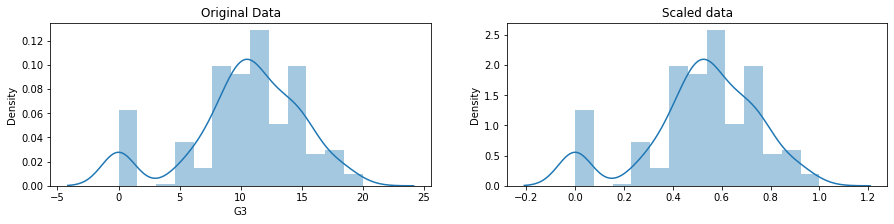

In [ ]:
# select the final grade column
original_G3_data = pd.DataFrame(dt_students_mat.G3)

# scale the grads from 0 to 1
scaled_G3_data = minmax_scaling(original_G3_data, columns=['G3'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(dt_students_mat.G3, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_G3_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [ ]:
print('Original data\nPreview:\n', original_G3_data.head())
print('Minimum value:', float(original_G3_data.min()),
      '\nMaximum value:', float(original_G3_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_G3_data.head())
print('Minimum value:', float(scaled_G3_data.min()),
      '\nMaximum value:', float(scaled_G3_data.max()))

Original data
Preview:
    G3
0   6
1   6
2  10
3  15
4  10
Minimum value: 0.0 
Maximum value: 20.0
______________________________

Scaled data
Preview:
      G3
0  0.30
1  0.30
2  0.50
3  0.75
4  0.50
Minimum value: 0.0 
Maximum value: 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

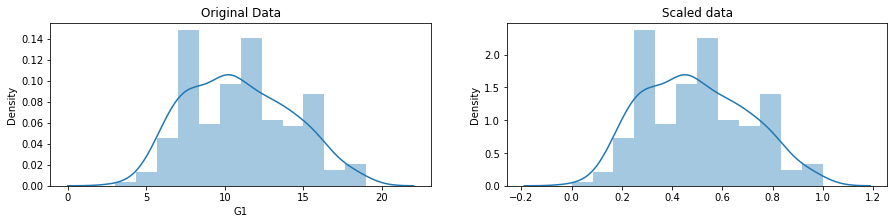

In [ ]:
# select the first period grade column
original_G1_data = pd.DataFrame(dt_students_mat.G1)

# scale the first period grade from 0 to 1
scaled_G1_data = minmax_scaling(original_G1_data, columns=['G1'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(dt_students_mat.G1, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_G1_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [ ]:
print('Original data\nPreview:\n', original_G1_data.head())
print('Minimum value:', float(original_G1_data.min()),
      '\nMaximum value:', float(original_G1_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_G1_data.head())
print('Minimum value:', float(scaled_G1_data.min()),
      '\nMaximum value:', float(scaled_G1_data.max()))

Original data
Preview:
    G1
0   5
1   5
2   7
3  15
4   6
Minimum value: 3.0 
Maximum value: 19.0
______________________________

Scaled data
Preview:
        G1
0  0.1250
1  0.1250
2  0.2500
3  0.7500
4  0.1875
Minimum value: 0.0 
Maximum value: 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

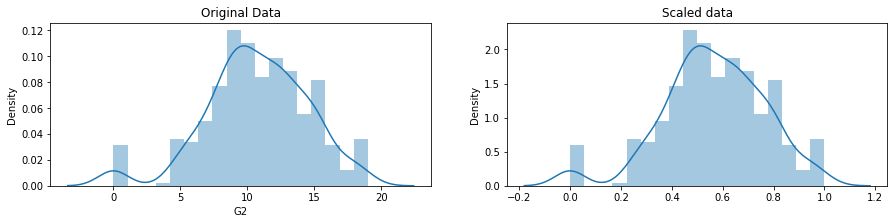

In [ ]:
# select the first period grade column
original_G2_data = pd.DataFrame(dt_students_mat.G2)

# scale the grads from 0 to 1
scaled_G2_data = minmax_scaling(original_G2_data, columns=['G2'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(dt_students_mat.G2, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_G2_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [ ]:
print('Original data\nPreview:\n', original_G2_data.head())
print('Minimum value:', float(original_G2_data.min()),
      '\nMaximum value:', float(original_G2_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_G2_data.head())
print('Minimum value:', float(scaled_G2_data.min()),
      '\nMaximum value:', float(scaled_G2_data.max()))

Original data
Preview:
    G2
0   6
1   5
2   8
3  14
4  10
Minimum value: 0.0 
Maximum value: 19.0
______________________________

Scaled data
Preview:
          G2
0  0.315789
1  0.263158
2  0.421053
3  0.736842
4  0.526316
Minimum value: 0.0 
Maximum value: 1.0


In [ ]:
dt_students_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
pip install fuzzywuzzy

In [ ]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# get all the unique values in the column
school = dt_students_mat['school'].unique()
sex = dt_students_mat['sex'].unique()
address = dt_students_mat['address'].unique()
famsize = dt_students_mat['famsize'].unique()
Pstatus = dt_students_mat['Pstatus'].unique()
Mjob = dt_students_mat['Mjob'].unique()
Fjob = dt_students_mat['Fjob'].unique()
reason = dt_students_mat['reason'].unique()
guardian = dt_students_mat['guardian'].unique()
# sort them alphabetically and then take a closer look
school.sort()
sex.sort()
address.sort()
famsize.sort()
Pstatus.sort()
Mjob.sort()
Fjob.sort()
reason.sort()
guardian.sort()
print(school)
print(sex)
print(address)
print(famsize)
print(Pstatus)
print(Mjob)
print(Fjob)
print(reason)
print(guardian)

['GP' 'MS']
['F' 'M']
['R' 'U']
['GT3' 'LE3']
['A' 'T']
['at_home' 'health' 'other' 'services' 'teacher']
['at_home' 'health' 'other' 'services' 'teacher']
['course' 'home' 'other' 'reputation']
['father' 'mother' 'other']
